# Arsal Ali

## Patients Re-Admission Prediction and EDA

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df0 = pd.read_csv('IDS_mapping.csv')
df1 = pd.read_csv('diabetic_data.csv')

df1['admission_type_id'] = df1['admission_type_id'].astype(str)
df0['admission_type_id'] = df0['admission_type_id'].astype(str)

df0 = df0.drop_duplicates(subset=['admission_type_id'])

df = df1.merge(df0, on='admission_type_id', how='left')

df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,description
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,NaN
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,Emergency
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,Emergency
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,Emergency
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,Emergency


##  Easy Level Questions 

### ✅ What is the shape of the dataset? (Number of rows and columns) 

In [3]:
df.shape

(101766, 51)

### ✅ What are the data types of each column? 

In [4]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id           object
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

### ✅ Are there any missing values in the dataset? If yes, how should they be handled?

In [5]:
df.replace('?', pd.NA, inplace=True)
df.replace('Unknown/Invalid', pd.NA, inplace=True)
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          3
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [6]:
df['readmitted'] = df['readmitted'].replace({'>30': 1, '<30': 1, 'NO': 0}).astype(int)

df['payer_code'] = df['payer_code'].fillna(df['payer_code'].mode()[0])

df['medical_specialty'] = df['medical_specialty'].fillna(df['medical_specialty'].mode()[0])

df['diag_1'] = df['diag_1'].fillna(df['diag_1'].mode()[0])

df['diag_2'] = df['diag_2'].fillna(df['diag_2'].mode()[0])

df['diag_3'] = df['diag_3'].fillna(df['diag_3'].mode()[0])

df['race'] = df['race'].fillna(df['race'].mode()[0])

df['description'] = df['description'].fillna(df['description'].mode()[0])

df['A1Cresult'] = df['A1Cresult'].fillna(df['A1Cresult'].mode()[0]) 
# 84.75 % values are missing , filling with the mode is only acceptable because the column isn't that necessary

df['max_glu_serum'] = df['max_glu_serum'].fillna(df['max_glu_serum'].mode()[0])
# 96.42 % values are missing , filling with the mode is only acceptable because the column isn't that necessary

df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

weight_categories = df['weight'].dropna().unique()

weights_distribution = df['weight'].value_counts(normalize=True)

df.loc[df['weight'].isna(), 'weight'] = np.random.choice(
    weight_categories, 
    size=df['weight'].isna().sum(), 
    p=weights_distribution[weight_categories].values
)

def convert_range_to_mean(value):
    if isinstance(value, str):
        value = value.strip().replace('[', '').replace(')', '')
        
        if '-' in value:
            try:
                lower, upper = map(int, value.split('-'))
                return (lower + upper) // 2
            except ValueError:
                return None
    return None

df['age'] = df['age'].apply(convert_range_to_mean).astype('Int64')
df['weight'] = df['weight'].apply(convert_range_to_mean).astype('Int64')

df = df.dropna()

C:\Users\arsal\AppData\Local\Temp\ipykernel_10124\1757048291.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['readmitted'] = df['readmitted'].replace({'>30': 1, '<30': 1, 'NO': 0}).astype(int)


### ✅ What is the overall distribution of the target variable (readmission within 30 days: Yes/No)?

In [7]:
df['readmitted'].value_counts()

readmitted
0    54812
1    46861
Name: count, dtype: int64

In [8]:
print(df['readmitted'].value_counts(normalize=True).mul(100).round(2))

readmitted
0    53.91
1    46.09
Name: proportion, dtype: float64


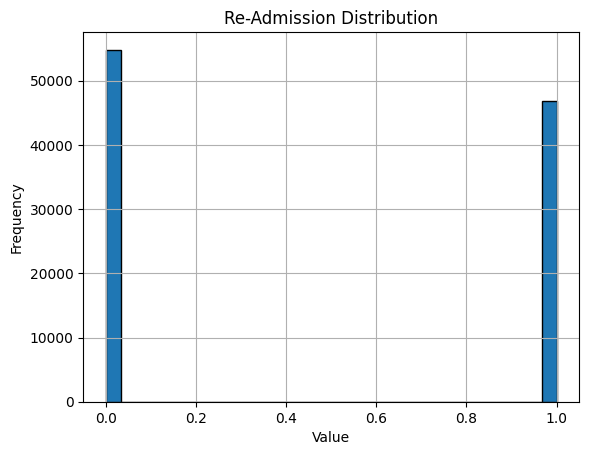

In [9]:
import matplotlib.pyplot as plt
df['readmitted'].hist(bins=30, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Re-Admission Distribution')
plt.show()

### ✅ What are the most common diagnoses among patients? 

diag_1 → Primary diagnosis (Main reason for hospitalization)

diag_2 → Secondary diagnosis (Another condition the patient has)

diag_3 → Tertiary diagnosis (A third condition, if applicable)

In [10]:
df['diag_1'].value_counts().head(3)

# 428 = Heart Failure
# 414 = Other forms of chronic ischemic heart disease
# 786 = Symptoms involving respiratory system and other chest symptoms

diag_1
428    6878
414    6577
786    4013
Name: count, dtype: int64

In [11]:
df['diag_2'].value_counts().head(3)

# 276 = Disorders of fluid, electrolyte, and acid-base balance
# 428 = Heart Failure
# 250 = Diabetes mellitus

diag_2
276    7105
428    6658
250    6063
Name: count, dtype: int64

In [12]:
df['diag_3'].value_counts().head(3)

# 250 = Diabetes mellitus
# 401 = Essential hypertension
# 276 = Disorders of fluid, electrolyte, and acid-base balance

diag_3
250    12963
401     8280
276     5172
Name: count, dtype: int64

In [13]:
all_diagnoses = pd.concat([df['diag_1'], df['diag_2'], df['diag_3']])
all_diagnoses.value_counts().head(3)

# 428 = Heart Failure
# 250 = Diabetes mellitus
# 276 = Disorders of fluid, electrolyte, and acid-base balance

250    19261
428    18106
276    14165
Name: count, dtype: int64

### ✅ What is the average age of patients?

In [14]:
print(f"Mean Age: ~ {df['age'].mean():.2f} years")

Mean Age: ~ 65.97 years


## Intermediate Level Questions

### ✅ Are there any duplicate records in the dataset?

In [15]:
df.duplicated().sum()

np.int64(0)

### ✅ How does the length of hospital stay vary across different patient groups?

In [16]:
df['time_in_hospital'].describe()

count    101673.000000
mean          4.396211
std           2.985242
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          14.000000
Name: time_in_hospital, dtype: float64

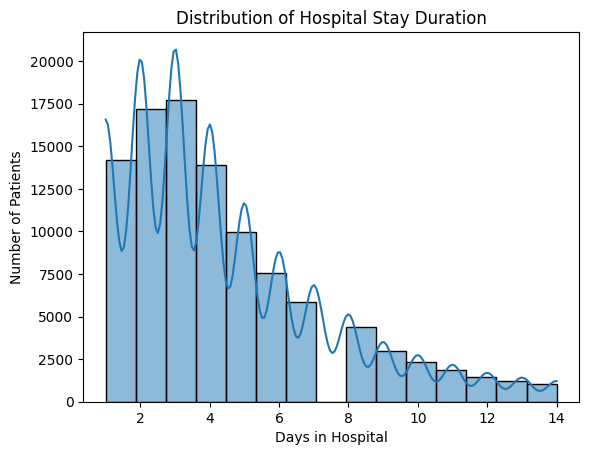

In [17]:
sns.histplot(df['time_in_hospital'], bins=15, kde=True)
plt.xlabel("Days in Hospital")
plt.ylabel("Number of Patients")
plt.title("Distribution of Hospital Stay Duration")
plt.show()

In [18]:
# Length of Stay by Age Group
df.groupby('age')['time_in_hospital'].mean().sort_index()

age
5     2.550000
15    3.191304
25    3.567372
35    3.800636
45    4.039094
55    4.126044
65    4.382968
75    4.590047
85    4.809180
95    4.756805
Name: time_in_hospital, dtype: float64

In [19]:
# Length of Stay by Gender
df.groupby('gender')['time_in_hospital'].mean()

gender
Female    4.478577
Male      4.300440
Name: time_in_hospital, dtype: float64

In [20]:
# Length of Stay by Admission Type
df.groupby('admission_type_id')['time_in_hospital'].mean()

admission_type_id
1    4.378444
2    4.610537
3    4.321394
4    3.200000
5    3.947522
6    4.582245
7    4.857143
8    3.065831
Name: time_in_hospital, dtype: float64

In [21]:
# Length of Stay by Diagnosis
df.groupby('diag_1')['time_in_hospital'].mean().nlargest(10)

# Get the descriptions of these ICD-9 codes from Internet.

diag_1
145    13.000000
10     12.000000
48     11.500000
114    11.000000
731    10.500000
862    10.333333
133    10.000000
V43    10.000000
324     9.666667
936     9.333333
Name: time_in_hospital, dtype: float64

### ✅ How does the readmission rate vary by age group and gender?

In [22]:
df.groupby('age')['readmitted'].value_counts(normalize=True).unstack() * 100

readmitted,0,1
age,,
5,81.875000,18.125000
15,61.739130,38.260870
25,55.045317,44.954683
35,57.343584,42.656416
45,55.579688,44.420312
55,56.020882,43.979118
65,53.748219,46.251781
75,51.881576,48.118424
85,51.719123,48.280877


In [23]:
df.groupby('gender')['readmitted'].value_counts(normalize=True).unstack() * 100

readmitted,0,1
gender,,
Female,53.086239,46.913761
Male,54.868010,45.131990


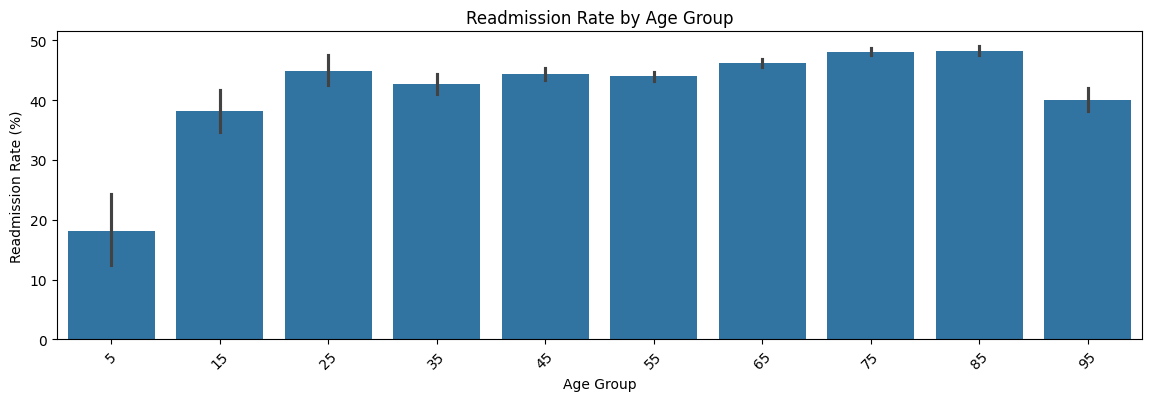

In [24]:
plt.figure(figsize=(14, 4))
sns.barplot(x='age', y='readmitted', data=df, estimator=lambda x: sum(x) / len(x) * 100)

plt.xticks(rotation=45)
plt.xlabel("Age Group")
plt.ylabel("Readmission Rate (%)")
plt.title("Readmission Rate by Age Group")
plt.show()

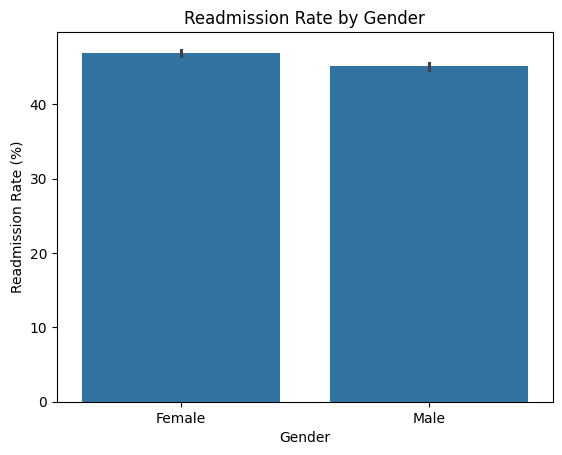

In [25]:
sns.barplot(x='gender', y=(df['readmitted']).astype(int), data=df, estimator=lambda x: sum(x) / len(x) * 100)
plt.xlabel("Gender")
plt.ylabel("Readmission Rate (%)")
plt.title("Readmission Rate by Gender")
plt.show()

### ✅ What is the relationship between comorbidities (e.g., diabetes, heart disease) and readmission rates?

In [26]:
df['diag_1'].value_counts().head(10)

diag_1
428    6878
414    6577
786    4013
410    3608
486    3504
427    2765
491    2274
715    2144
682    2041
434    2028
Name: count, dtype: int64

In [27]:
def has_condition(code_series, condition_codes):
    return code_series.astype(str).str.startswith(tuple(condition_codes))

df['diabetes'] = has_condition(df['diag_1'], ['250']) | has_condition(df['diag_2'], ['250']) | has_condition(df['diag_3'], ['250'])
df['heart_disease'] = has_condition(df['diag_1'], ['410', '411', '412', '413', '414', '428']) | \
                      has_condition(df['diag_2'], ['410', '411', '412', '413', '414', '428']) | \
                      has_condition(df['diag_3'], ['410', '411', '412', '413', '414', '428'])
df['hypertension'] = has_condition(df['diag_1'], ['401', '402', '403', '404', '405']) | \
                     has_condition(df['diag_2'], ['401', '402', '403', '404', '405']) | \
                     has_condition(df['diag_3'], ['401', '402', '403', '404', '405'])
                     
comorbidities = ['diabetes', 'heart_disease', 'hypertension']

for condition in comorbidities:
    rate = df[df[condition]]['readmitted'].value_counts(normalize=True) * 100
    print(f"Readmission Rates for {condition.capitalize()}:\n{rate}\n")

Readmission Rates for Diabetes:
readmitted
0    54.807163
1    45.192837
Name: proportion, dtype: float64

Readmission Rates for Heart_disease:
readmitted
0    50.798576
1    49.201424
Name: proportion, dtype: float64

Readmission Rates for Hypertension:
readmitted
0    55.076488
1    44.923512
Name: proportion, dtype: float64



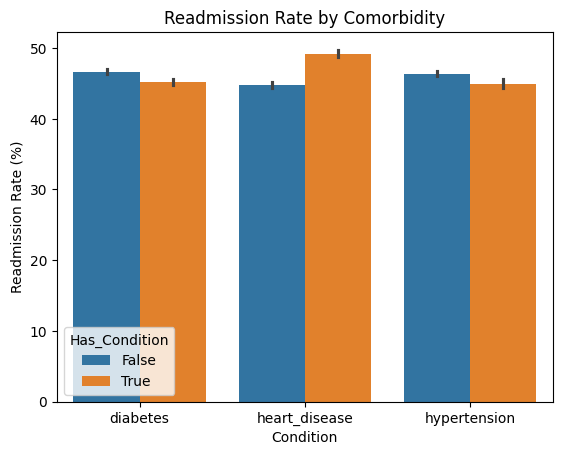

In [28]:
df_melted = df.melt(id_vars=['readmitted'], value_vars=comorbidities, var_name='Condition', value_name='Has_Condition')
sns.barplot(x='Condition', y=(df_melted['readmitted']).astype(int), hue='Has_Condition', data=df_melted, estimator=lambda x: sum(x) / len(x) * 100)

plt.xlabel("Condition")
plt.ylabel("Readmission Rate (%)")
plt.title("Readmission Rate by Comorbidity")
plt.show()

### ✅ How does medication usage impact the likelihood of readmission?

In [29]:
df['any_medication'] = (df.iloc[:, 25:50] != 'No').any(axis=1).astype(int)

df['oral_med'] = (df[['metformin', 'glimepiride', 'glipizide', 'glyburide', 
                       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol']] != 'No').any(axis=1).astype(int)

df['insulin_usage'] = (df['insulin'] != 'No').astype(int)

df['combination_med'] = (df[['glyburide-metformin', 'glipizide-metformin', 
                             'glimepiride-pioglitazone', 'metformin-rosiglitazone', 
                             'metformin-pioglitazone']] != 'No').any(axis=1).astype(int)

medication_readmission = df.groupby(['oral_med', 'insulin_usage', 'combination_med'])['readmitted'].mean() * 100

print(medication_readmission)

oral_med  insulin_usage  combination_med
0         0              0                  40.802898
                         1                  51.923077
          1              0                  49.299738
                         1                  44.705882
1         0              0                  46.630482
                         1                  51.685393
          1              0                  46.617891
                         1                  45.238095
Name: readmitted, dtype: float64


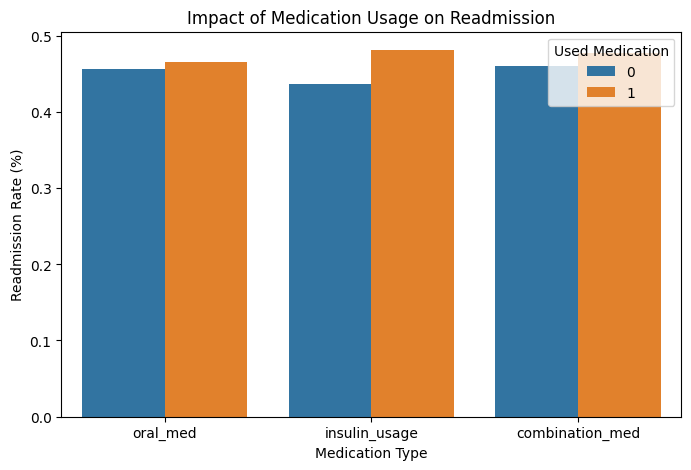

In [30]:
med_df = df.melt(id_vars=['readmitted'], value_vars=['oral_med', 'insulin_usage', 'combination_med'],
                 var_name='Medication Type', value_name='Used')

plt.figure(figsize=(8, 5))
sns.barplot(data=med_df, x='Medication Type', y='readmitted', hue='Used' , errorbar=None)
plt.xlabel("Medication Type")
plt.ylabel("Readmission Rate (%)")
plt.title("Impact of Medication Usage on Readmission")
plt.legend(title="Used Medication")
plt.show()

### ✅ Do certain discharge conditions (e.g., home care vs. self-care) affect readmission risk?

In [31]:
discharge_readmit = df.groupby('discharge_disposition_id')['readmitted'].mean().sort_values(ascending=False)
print(discharge_readmit)

discharge_disposition_id
15    0.730159
10    0.666667
12    0.666667
28    0.611511
16    0.545455
6     0.542649
22    0.537381
9     0.523810
5     0.504649
3     0.498852
7     0.498387
8     0.490741
24    0.479167
2     0.475024
25    0.473205
4     0.469287
1     0.450214
23    0.423358
18    0.402604
17    0.357143
27    0.200000
13    0.137845
14    0.083558
11    0.000000
19    0.000000
20    0.000000
Name: readmitted, dtype: float64


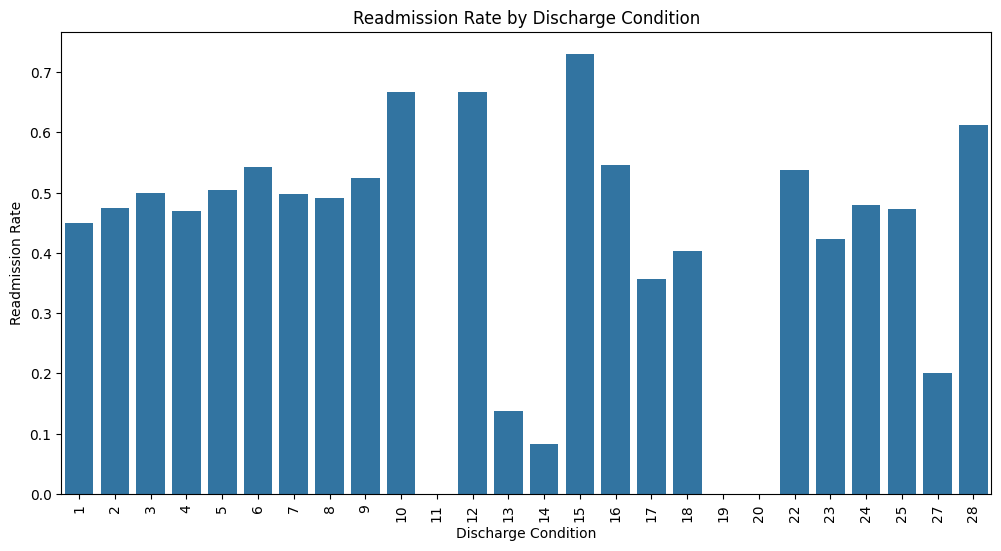

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='discharge_disposition_id', y='readmitted', errorbar=None)
plt.xticks(rotation=90)
plt.xlabel("Discharge Condition")
plt.ylabel("Readmission Rate")
plt.title("Readmission Rate by Discharge Condition")
plt.show()

### ✅ How does ICU admission correlate with readmission?

In [33]:
df['icu_admission'] = df['number_inpatient'].apply(lambda x: 1 if x > 0 else 0)

icu_readmit = df.groupby('icu_admission')['readmitted'].value_counts(normalize=True).unstack() * 100
print(icu_readmit)

readmitted             0          1
icu_admission                      
0              61.498498  38.501502
1              38.880746  61.119254


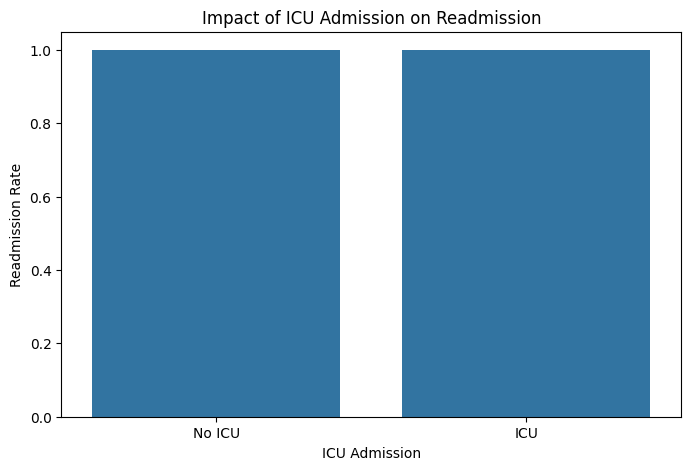

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='icu_admission', y=(df['readmitted'] != 'NO').astype(int), errorbar=None)
plt.xticks([0,1], ['No ICU', 'ICU'])
plt.xlabel("ICU Admission")
plt.ylabel("Readmission Rate")
plt.title("Impact of ICU Admission on Readmission")
plt.show()

## Advanced Level Questions 

### ✅ Can we identify the top 10 features that influence readmission the most?

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

df = df.drop(columns=['payer_code','description'])

object_cols = df.select_dtypes(include=['object']).columns

encoder = LabelEncoder()
for col in object_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))

X = df.drop(columns=['readmitted', 'encounter_id', 'patient_nbr'])
y = df['readmitted']

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance.head(10))

num_lab_procedures          0.084452
diag_1                      0.078519
diag_2                      0.077018
diag_3                      0.074943
num_medications             0.073314
time_in_hospital            0.052416
age                         0.044230
discharge_disposition_id    0.040732
weight                      0.039518
number_diagnoses            0.036831
dtype: float64


### ✅ How does readmission probability change over time (seasonality analysis)?

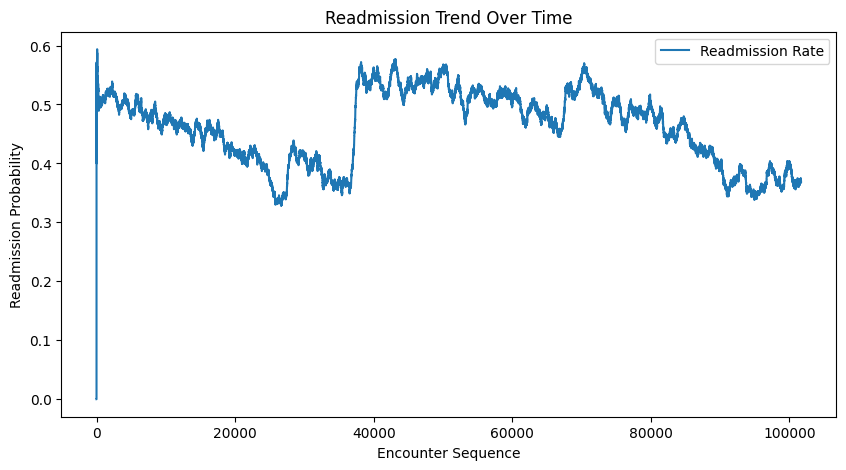

In [36]:
df = df.sort_values(by='encounter_id')
df['encounter_index'] = range(len(df))

df['rolling_avg'] = df['readmitted'].rolling(window=1000, min_periods=1).mean()

plt.figure(figsize=(10, 5))
plt.plot(df['encounter_index'], df['rolling_avg'], label='Readmission Rate')
plt.xlabel('Encounter Sequence')
plt.ylabel('Readmission Probability')
plt.title('Readmission Trend Over Time')
plt.legend()
plt.show()

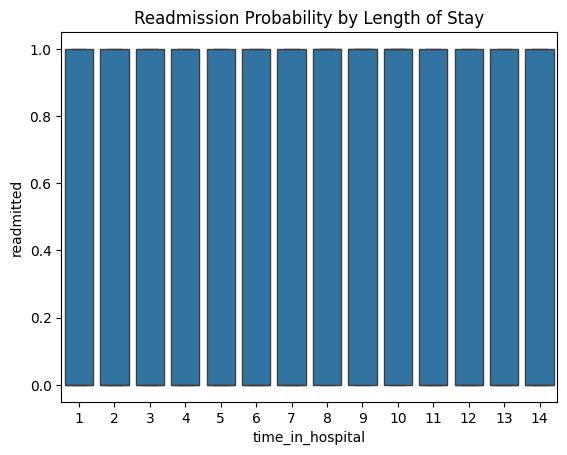

In [37]:
sns.boxplot(x=df['time_in_hospital'], y=df['readmitted'])
plt.title("Readmission Probability by Length of Stay")
plt.show()

<Axes: title={'center': 'Readmission Rate by Admission Type'}, xlabel='admission_type_id'>

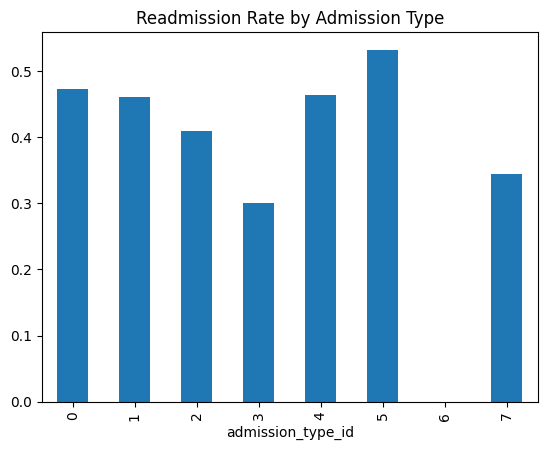

In [38]:
readmission_by_admission = df.groupby('admission_type_id')['readmitted'].mean()
readmission_by_admission.plot(kind='bar', title="Readmission Rate by Admission Type")

### ✅ What are the key clusters of patients based on principal component analysis (PCA)?

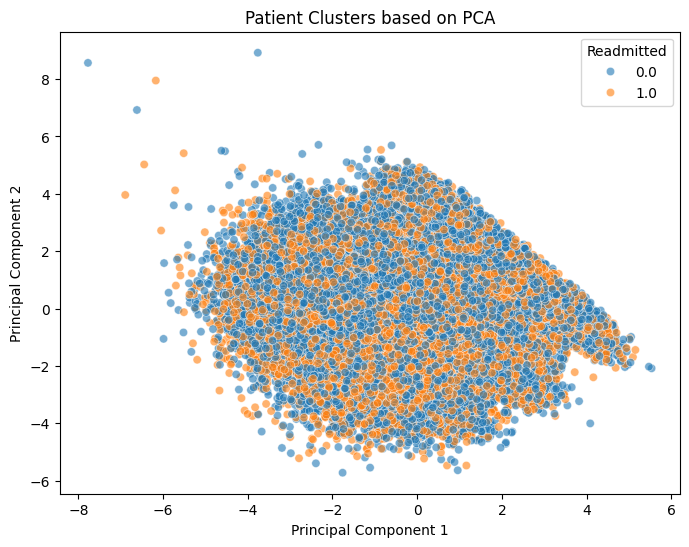

In [39]:
from sklearn.preprocessing import StandardScaler

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
X_numeric = df[numeric_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['readmitted'] = df['readmitted']

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['readmitted'], alpha=0.6)
plt.title('Patient Clusters based on PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Readmitted")
plt.show()

In [40]:
pca_components = pd.DataFrame(pca.components_, columns=numeric_cols, index=['PC1', 'PC2'])
print(pca_components.T.abs().sort_values(by='PC1', ascending=False).head(10))

                       PC1       PC2
change            0.369706  0.254125
diabetesMed       0.360448  0.284854
encounter_index   0.328417  0.399787
encounter_id      0.321273  0.402807
insulin_usage     0.296694  0.108294
num_medications   0.255227  0.085895
oral_med          0.254664  0.338862
patient_nbr       0.229610  0.299373
number_diagnoses  0.216995  0.203005
insulin           0.166315  0.066298


### ✅ Can we detect anomalies in readmission patterns using unsupervised learning (e.g., Isolation Forest, DBSCAN)?

In [41]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numeric_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['anomaly_if'] = iso_forest.fit_predict(X_scaled)

df['anomaly_if'] = df['anomaly_if'].map({1: 'Normal', -1: 'Anomalous'})

print(df['anomaly_if'].value_counts())

anomaly_if
Normal       96589
Anomalous     5084
Name: count, dtype: int64


In [42]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=10)
df['anomaly_dbscan'] = dbscan.fit_predict(X_scaled)

df['anomaly_dbscan'] = df['anomaly_dbscan'].map(lambda x: 'Normal' if x != -1 else 'Anomalous')

print(df['anomaly_dbscan'].value_counts())

anomaly_dbscan
Anomalous    101628
Normal           45
Name: count, dtype: int64


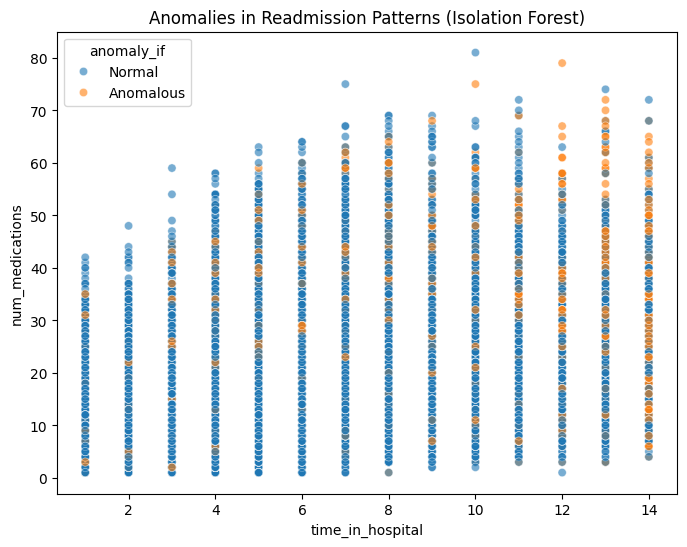

In [43]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['time_in_hospital'], y=df['num_medications'], hue=df['anomaly_if'], alpha=0.6)
plt.title("Anomalies in Readmission Patterns (Isolation Forest)")
plt.show()

### ✅ How do hospital characteristics (e.g., bed availability, staffing levels) impact readmission?

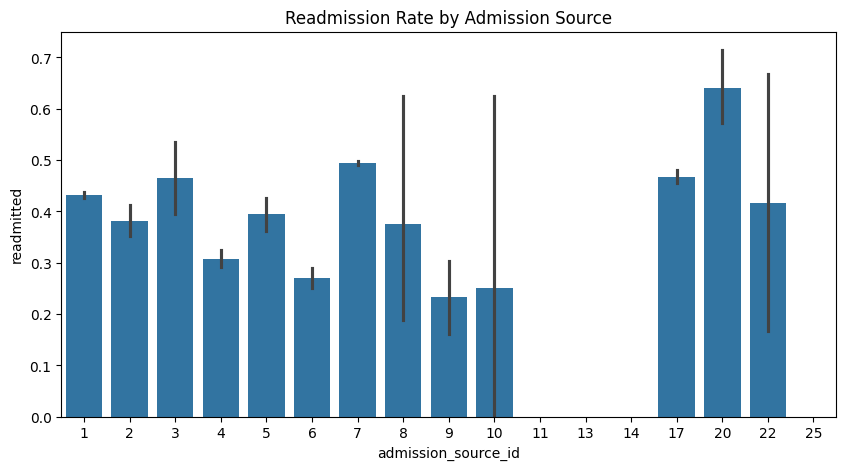

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['admission_source_id'], y=df['readmitted'])
plt.title("Readmission Rate by Admission Source")
plt.show()

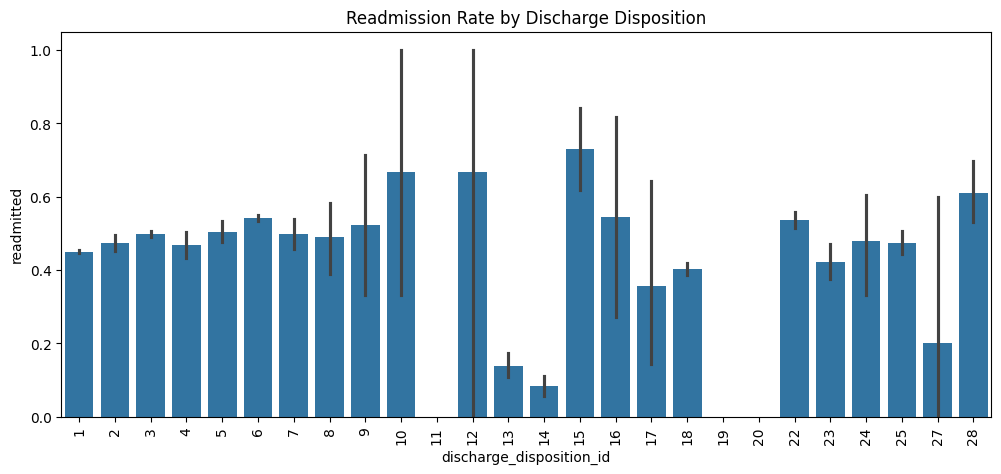

In [45]:
plt.figure(figsize=(12,5))
sns.barplot(x=df['discharge_disposition_id'], y=df['readmitted'])
plt.xticks(rotation=90)
plt.title("Readmission Rate by Discharge Disposition")
plt.show()

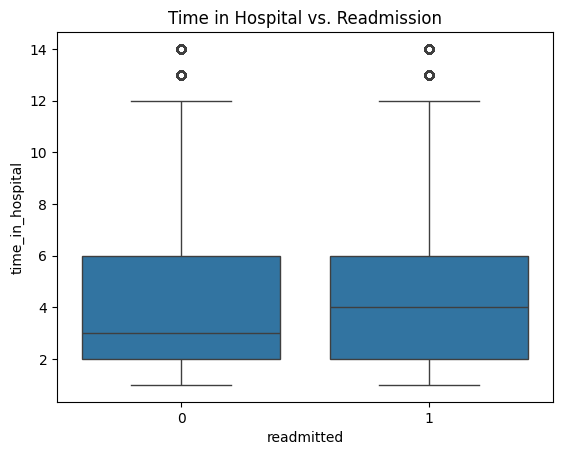

In [46]:
sns.boxplot(x=df['readmitted'], y=df['time_in_hospital'])
plt.title("Time in Hospital vs. Readmission")
plt.show()

In [47]:
import statsmodels.api as sm

X_hospital = df[['admission_source_id', 'discharge_disposition_id', 'time_in_hospital', 'num_procedures']]
X_hospital = sm.add_constant(X_hospital)

y = df['readmitted']

model = sm.Logit(y, X_hospital)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.686354
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:             readmitted   No. Observations:               101673
Model:                          Logit   Df Residuals:                   101668
Method:                           MLE   Df Model:                            4
Date:                Thu, 06 Mar 2025   Pseudo R-squ.:                0.005409
Time:                        01:41:10   Log-Likelihood:                -69784.
converged:                       True   LL-Null:                       -70163.
Covariance Type:            nonrobust   LLR p-value:                5.883e-163
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.3303      0.015    -21.476      0.000      -0.360

### ✅ Can we visualize correlations using a heatmap to identify multicollinearity?

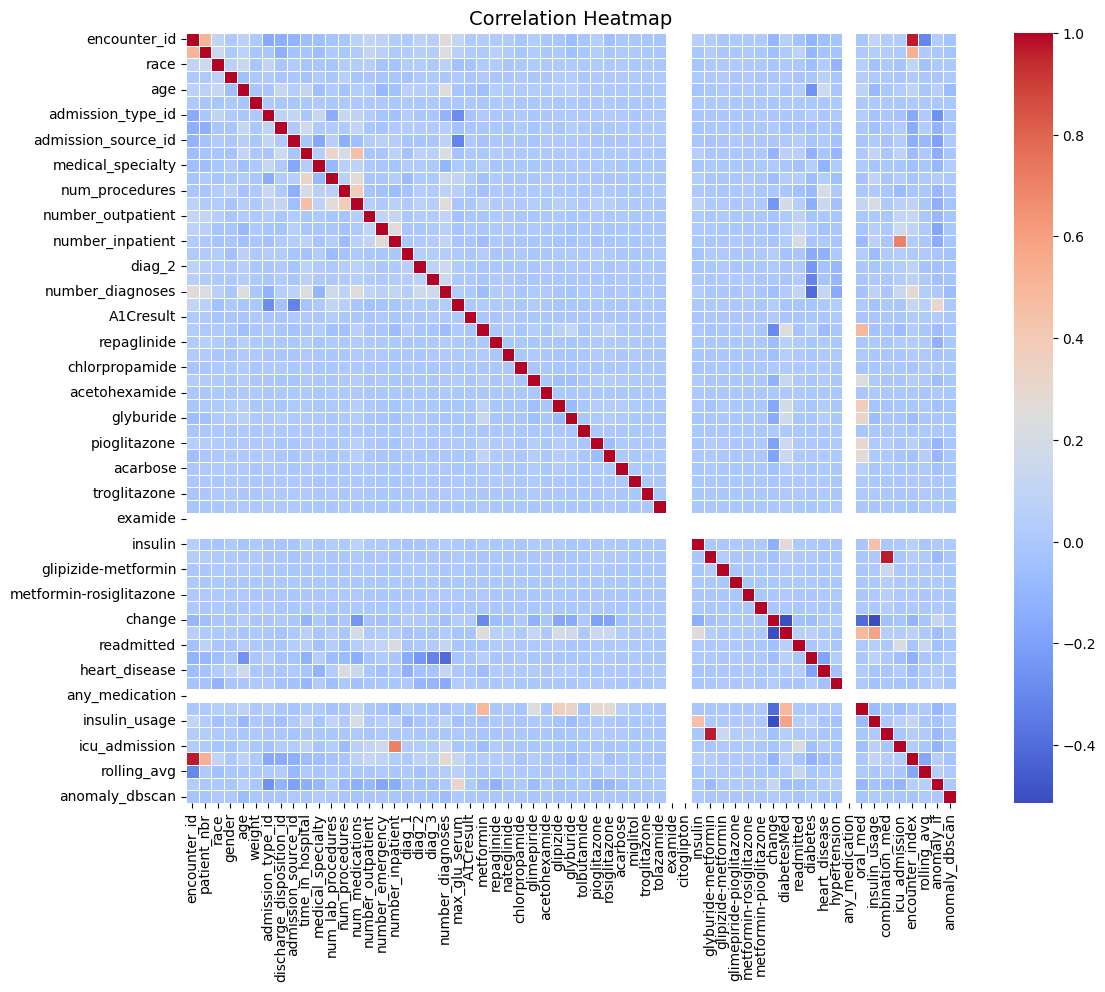

In [48]:
categorical_cols = df.select_dtypes(include=['object']).columns

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))

corr_matrix = df.corr()

plt.figure(figsize=(15, 10))

sns.heatmap(
    corr_matrix, 
    annot=False,
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=0.5, 
    square=True,
    cbar=True
)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

### ✅ Do patients with multiple previous readmissions have distinct risk profiles?

In [49]:
df['readmission_count'] = df.groupby('patient_nbr')['readmitted'].transform('sum')

df['readmission_category'] = pd.cut(
    df['readmission_count'], 
    bins=[-1, 0, 1, float('inf')], 
    labels=['No Readmission', 'Single Readmission', 'Multiple Readmissions']
)

df['readmission_category'].value_counts()

readmission_category
No Readmission           42729
Multiple Readmissions    31524
Single Readmission       27420
Name: count, dtype: int64

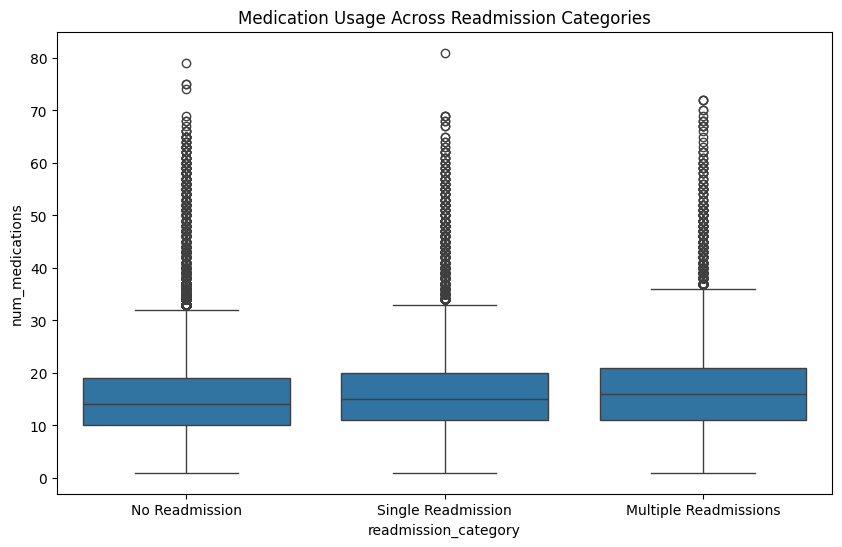

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='readmission_category', y='num_medications', data=df)
plt.title("Medication Usage Across Readmission Categories")
plt.show()

In [51]:
from scipy.stats import f_oneway

group1 = df[df['readmission_category'] == 'No Readmission']['num_medications']
group2 = df[df['readmission_category'] == 'Single Readmission']['num_medications']
group3 = df[df['readmission_category'] == 'Multiple Readmissions']['num_medications']

f_stat, p_value = f_oneway(group1, group2, group3)
print(f"ANOVA Test Result: F-Statistic = {f_stat}, P-Value = {p_value}")

ANOVA Test Result: F-Statistic = 240.97989323990706, P-Value = 3.8997689879466694e-105


### Data Preprocessing and Feature Engineering

In [52]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

df['readmission_category'] = df['readmission_category'].replace({
    'No Readmission': 0,
    'Single Readmission': 1,
    'Multiple Readmissions': 2
}).astype(int)

numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

if numerical_cols:
    num_imputer = SimpleImputer(strategy="median")
    df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

binary_cols = ['gender', 'diabetesMed', 'change']
for col in binary_cols:
    if col in df.columns:
        label_enc = LabelEncoder()
        df[col] = label_enc.fit_transform(df[col])

df['Age × Length_of_Stay'] = df['age'] * df['time_in_hospital']
df['Medications × Diagnoses'] = df['num_medications'] * df['number_diagnoses']

X = df.drop(columns=['readmitted', 'encounter_id', 'patient_nbr'], errors='ignore')
y = df['readmitted']

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

rfe = RFE(estimator=rf_model, n_features_to_select=10)
X_selected = rfe.fit_transform(X, y)
selected_features = X.columns[rfe.support_]

print("Top Features:", selected_features)

C:\Users\arsal\AppData\Local\Temp\ipykernel_10124\226321300.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['readmission_category'] = df['readmission_category'].replace({
C:\Users\arsal\AppData\Local\Temp\ipykernel_10124\226321300.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['readmission_category'] = df['readmission_category'].replace({


Top Features: Index(['num_lab_procedures', 'number_inpatient', 'diag_1', 'diag_3',
       'encounter_index', 'rolling_avg', 'readmission_count',
       'readmission_category', 'Age × Length_of_Stay',
       'Medications × Diagnoses'],
      dtype='object')


## Training Models

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)

print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Performance:
              precision    recall  f1-score   support

         0.0       0.79      0.86      0.82     10965
         1.0       0.82      0.73      0.77      9370

    accuracy                           0.80     20335
   macro avg       0.81      0.80      0.80     20335
weighted avg       0.80      0.80      0.80     20335



c:\Users\arsal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_log)

precision = precision_score(y_test, y_pred_log, average='weighted')
recall = recall_score(y_test, y_pred_log, average='weighted')
f1 = f1_score(y_test, y_pred_log, average='weighted')

y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

conf_matrix = confusion_matrix(y_test, y_pred_log)

print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1-Score: {f1:.4f}")
print(f"✅ ROC-AUC Score: {roc_auc:.4f}")
print("✅ Confusion Matrix:")
print(conf_matrix)

✅ Accuracy: 0.8023
✅ Precision: 0.8039
✅ Recall: 0.8023
✅ F1-Score: 0.8010
✅ ROC-AUC Score: 0.8845
✅ Confusion Matrix:
[[9475 1490]
 [2530 6840]]


In [55]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgbm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train, y_test = y_train.astype(int), y_test.astype(int)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

xgb_model = xgb.XGBClassifier(n_estimators=100, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

lgbm_model = lgbm.LGBMClassifier(n_estimators=100, random_state=42)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))

print("LightGBM Performance:")
print(classification_report(y_test, y_pred_lgbm))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 37491, number of negative: 43847
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2034
[LightGBM] [Info] Number of data points in the train set: 81338, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460928 -> initscore=-0.156605
[LightGBM] [Info] Start training from score -0.156605
Random Forest Performance:
              precision    recall  f1-score   support

           0       0.96      0.89      0.93     10965
           1       0.89      0.96      0.92      9370

    accuracy                           0.92     20335
   macro avg       0.92      0.93      0.92     20335
weighted avg       0.93      0.92      0.92     20335

XGBoost 

In [56]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

X_np = X.to_numpy().astype(np.float32)
y_np = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

y_train_tensor = torch.clamp(y_train_tensor, 0, 1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor, y_train_tensor = X_train_tensor.to(device), y_train_tensor.to(device)
X_test_tensor, y_test_tensor = X_test_tensor.to(device), y_test_tensor.to(device)

class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return self.softmax(x)

input_size = X_train.shape[1]
model = MLP(input_size).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 50
batch_size = 32

for epoch in range(epochs):
    for i in range(0, len(X_train_tensor), batch_size):
        X_batch = X_train_tensor[i:i+batch_size]
        y_batch = y_train_tensor[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

with torch.no_grad():
    test_outputs = model(X_test_tensor)
    predictions = torch.argmax(test_outputs, dim=1)
    y_prob = test_outputs[:, 1].cpu().numpy()

y_test_np = y_test_tensor.cpu().numpy()
y_pred_np = predictions.cpu().numpy()

accuracy = accuracy_score(y_test_np, y_pred_np)
print(f"\n✅ Test Accuracy: {accuracy * 100:.2f}%")

print("\n✅ Classification Report:\n", classification_report(y_test_np, y_pred_np))

roc_auc = roc_auc_score(y_test_np, y_prob)
print(f"\n✅ ROC-AUC Score: {roc_auc:.4f}")

conf_matrix = confusion_matrix(y_test_np, y_pred_np)
print("\n✅ Confusion Matrix:\n", conf_matrix)

Epoch [10/50], Loss: 0.8517
Epoch [20/50], Loss: 0.8517
Epoch [30/50], Loss: 0.8517
Epoch [40/50], Loss: 0.8517
Epoch [50/50], Loss: 0.8517

✅ Test Accuracy: 53.92%

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.54      1.00      0.70     10965
           1       0.00      0.00      0.00      9370

    accuracy                           0.54     20335
   macro avg       0.27      0.50      0.35     20335
weighted avg       0.29      0.54      0.38     20335


✅ ROC-AUC Score: 0.4997

✅ Confusion Matrix:
 [[10965     0]
 [ 9370     0]]


c:\Users\arsal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\arsal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\arsal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### Storing the Models

In [57]:
import joblib

joblib.dump(log_reg, "log_reg_model.pkl")
print("✅ Logistic Regression model saved successfully!")

✅ Logistic Regression model saved successfully!


In [58]:
log_reg = joblib.load("log_reg_model.pkl")
print("✅ Logistic Regression model loaded successfully!")

✅ Logistic Regression model loaded successfully!


In [59]:
y_pred_log = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log, average='weighted')
recall = recall_score(y_test, y_pred_log, average='weighted')
f1 = f1_score(y_test, y_pred_log, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred_log)

print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1-Score: {f1:.4f}")
print(f"✅ ROC-AUC Score: {roc_auc:.4f}")
print("✅ Confusion Matrix:")
print(conf_matrix)

✅ Accuracy: 0.8023
✅ Precision: 0.8039
✅ Recall: 0.8023
✅ F1-Score: 0.8010
✅ ROC-AUC Score: 0.8845
✅ Confusion Matrix:
[[9475 1490]
 [2530 6840]]


c:\Users\arsal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\arsal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [60]:
import joblib
import pickle

joblib.dump(rf, "random_forest_model.pkl")

with open("xgb_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)

with open("lgbm_model.pkl", "wb") as f:
    pickle.dump(lgbm_model, f)

print("✅ Models saved successfully!")

✅ Models saved successfully!


In [61]:
rf_loaded = joblib.load("random_forest_model.pkl")

with open("xgb_model.pkl", "rb") as f:
    xgb_loaded = pickle.load(f)

with open("lgbm_model.pkl", "rb") as f:
    lgbm_loaded = pickle.load(f)

print("✅ Models loaded successfully!")

✅ Models loaded successfully!


In [62]:
y_pred_rf = rf_loaded.predict(X_test)
y_pred_xgb = xgb_loaded.predict(X_test)
y_pred_lgbm = lgbm_loaded.predict(X_test)

print(y_pred_rf)
print(y_pred_xgb)
print(y_pred_lgbm)

c:\Users\arsal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[0 0 1 ... 1 1 1]
[0 0 1 ... 1 1 0]
[0 0 1 ... 1 1 1]


In [63]:
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict()
}, "mlp_model.pth")

print("✅ PyTorch model saved successfully!")

✅ PyTorch model saved successfully!


In [64]:
model = MLP(input_size).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

checkpoint = torch.load("mlp_model.pth", map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

model.eval()
print("✅ PyTorch model loaded successfully!")

✅ PyTorch model loaded successfully!


In [65]:
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    predictions = torch.argmax(test_outputs, dim=1)
    accuracy = (predictions == y_test_tensor).sum().item() / y_test_tensor.size(0)

print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 53.92%


In [66]:
import joblib

# Save models
joblib.dump(rf_model, "rf_model.pkl")
joblib.dump(xgb_model, "xgb_model.pkl")
joblib.dump(lgbm_model, "lgbm_model.pkl")

['lgbm_model.pkl']